# Web Scraping: Part II - Scraping the Clemson Tigers Roster

```
Prepared for CPSC4300/6300 Section 001 -- Applied Data Science
Xizhou Feng
Clemson University
Fall 2020
```

# Overview

In this notebook, we use the Blog by Brendan Martin, *Ultimate Guide to Web Scraping with Python Part 1: Requests and BeautifulSoup* (https://www.learndatasci.com/tutorials/ultimate-guide-web-scraping-w-python-requests-and-beautifulsoup/) as a template to create our notebook.

# Examine the Structure of the Clemson Tigers Roster

Open the [ESPN's Clemson Tigers Roster webpage](https://www.espn.com/college-football/team/roster/_/id/228/clemson-tigers "ESPN's Clemson Tigers Roster") in your browser and examine its contents and structure using the "Developer Tools" of your browser.

You may see a level 1 heading **Clemson Tigers Roste** followed by three tables captioned with "Offense", "Defense", and "Special Team".

# Download Web pages from Website

As pointed out by Brendan in his blog, every time you load a web page,  you're making a request to a server and an incorrect code may submit thousands of requests a second to a website, which can cause damages to the owner. With this in mind, you want to be very careful with how we program scrapers to avoid crashing sites and causing damage. 

Normally, you should follow the following two guidelines:

+ Always check the website's policy (sites/robots.txt) about web crawling using robots.
+ Every time we scrape a website we want to attempt to make only one request per page. 

## Check The Sites's Robots Policy

Open http://www.espn.com/robots.txt in your browser and skim the contents.

```
# robots.txt for www.espn.com

User-agent: *
Disallow: */_/group/
Disallow: */_/scoreboard/
Disallow: */_/week/
Disallow: */_/year/20
Disallow: */admin/
Disallow: */boxscore?/
Disallow: */cat/
... more stuff ..
```

A good news is that team roster is allowed (not among the list of disallowed pages) to scape at the ESPN site.

## Make Web Requests

We you interact with a website, you communicate the web servers using HTTP the protocol. The HTTP protocol specifies a set of methods such as `GET` and `POST` for you to talk with the webserver. The `requests` library is the de facto standard for making HTTP requests in Python. It abstracts the complexities of making requests behind a simple API. If you are not familar with the concepts around HTTP request, you may read a guide provided by Alex Ronquill (https://realpython.com/python-requests/).

The code below shows how we make a request to get the Clemson Tigers Roste web page.

In [1]:
import requests
from requests.exceptions import HTTPError

url = 'https://www.espn.com/college-football/team/roster/_/id/228/clemson-tigers'

try: 
    response = requests.get(url)
except HTTPError as http_err:
    print('HTTP error occurred: {}'.format(http_err)) 
except Exception as err:
    print('Other error occurred: {}'.format(err))
else:
    print('Requesting {} is successful'.format(url))

Requesting https://www.espn.com/college-football/team/roster/_/id/228/clemson-tigers is successful


In [2]:
print(type(response))
print(response)

<class 'requests.models.Response'>
<Response [200]>


You can list the attributes and methods of a response object using the `dir` function, the `__dict__` or `__attrs__` attributes of the object.

In [3]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [4]:
response.__dict__.keys()

dict_keys(['_content', '_content_consumed', '_next', 'status_code', 'headers', 'raw', 'url', 'encoding', 'history', 'reason', 'cookies', 'elapsed', 'request', 'connection'])

In [5]:
response.__attrs__

['_content',
 'status_code',
 'headers',
 'url',
 'history',
 'encoding',
 'reason',
 'cookies',
 'elapsed',
 'request']

In [6]:
response.content

b'\n        <!doctype html>\n        <html lang="en">\n            <head>\n                <meta charSet="utf-8" />\n\n                <!-- ESPNFITT | 43afe0d4d550 | 4076 | 955e0eb0ecd8a0301101a5f70bd91686dd88caf8 | Tue, 01 Sep 2020 21:55:34 GMT -->\n                \n                <title data-react-helmet="true">Clemson Tigers Roster | ESPN</title>\n                <meta data-react-helmet="true" name="description" content="Visit ESPN to view the Clemson Tigers team roster for the current season"/><meta data-react-helmet="true" name="keywords" content="College Football, Football, Clemson Tigers, Roster"/><meta data-react-helmet="true" property="fb:app_id" content="116656161708917"/><meta data-react-helmet="true" property="og:site_name" content="ESPN"/><meta data-react-helmet="true" property="og:url" content="https://www.espn.com/college-football/team/roster/_/id/228/clemson-tigers"/><meta data-react-helmet="true" property="og:title" content="Clemson Tigers Roster | ESPN"/><meta data-

## Save the Webpage to a Local File

To avoid repeatedly requesting a same page, we may save the web page to a local file. 

In [7]:
def save_html(html, path):
    with open(path, 'wb') as f:
        f.write(html)
        
save_html(response.content, 'clemson_tiger_roster.html')

On linux, we can check the contenst of a text file using tools like `cat`, `head`, `tail`, `less`, `wc`, etc. You can run a linux command by puting a '!' character in frond of the command. For example.

In [8]:
!ls -al *.html

-rw-r--r-- 1 wenkanw cuuser 374122 Sep  1 17:57 clemson_tiger_roster.html


In [9]:
!head -n 5 clemson_tiger_roster.html


        <!doctype html>
        <html lang="en">
            <head>
                <meta charSet="utf-8" />


## Read HTML File

In [10]:
def read_html(path):
    with open(path, 'rb') as f:
        return f.read()
    
html = read_html('clemson_tiger_roster.html')

You can check the type and the contents of the html object by print both of them.

In [11]:
print(type(html))
print(html)

<class 'bytes'>
b'\n        <!doctype html>\n        <html lang="en">\n            <head>\n                <meta charSet="utf-8" />\n\n                <!-- ESPNFITT | 43afe0d4d550 | 4076 | 955e0eb0ecd8a0301101a5f70bd91686dd88caf8 | Tue, 01 Sep 2020 21:55:34 GMT -->\n                \n                <title data-react-helmet="true">Clemson Tigers Roster | ESPN</title>\n                <meta data-react-helmet="true" name="description" content="Visit ESPN to view the Clemson Tigers team roster for the current season"/><meta data-react-helmet="true" name="keywords" content="College Football, Football, Clemson Tigers, Roster"/><meta data-react-helmet="true" property="fb:app_id" content="116656161708917"/><meta data-react-helmet="true" property="og:site_name" content="ESPN"/><meta data-react-helmet="true" property="og:url" content="https://www.espn.com/college-football/team/roster/_/id/228/clemson-tigers"/><meta data-react-helmet="true" property="og:title" content="Clemson Tigers Roster | ES

It is easy to see that the html object has the same value and data type as the response.content object.

# Using Beautiful Soup to Extrac the Clemson Tigers Roster

## Make the Soup

In [12]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

## Find the Headings

In [13]:
soup.find_all('h1')

[<h1 class="ClubhouseHeader__Name ttu flex items-start n2"><span class="ClubhouseHeader__Rank clr-gray-05 pr2 n5">1</span><span class="flex flex-wrap"><span class="db pr3 nowrap fw-bold">Clemson</span><span class="db">Tigers</span></span></h1>,
 <h1 class="headline headline__h1 dib">Clemson Tigers Roster</h1>]

In [14]:
h1 = soup.find('h1', string='Clemson Tigers Roster')
h1

<h1 class="headline headline__h1 dib">Clemson Tigers Roster</h1>

In [15]:
tables = soup.find_all('table')

In [16]:
type(tables)

bs4.element.ResultSet

In [17]:
t1 = tables[0]
for c in t1.children:
    print(c.name)

colgroup
thead
tbody


In [18]:
t1.parent.parent.parent.parent.parent

<div><div class="ResponsiveTable Offense"><div class="Table__Title">Offense</div><div class="flex"><div class="Table__ScrollerWrapper relative overflow-hidden"><div class="Table__Shadow--left" style="opacity:0"></div><div class="Table__Scroller"><table class="Table" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="Table__TD--headshot Table__TH" title=""><span class="fw-medium w-100 dib Table__TD--headshot" style="min-width:40px" title=""></span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib" style="min-width:140px" title="">Name</span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib underline" titl

In [19]:
tb = t1.find("tbody")
for c in tb.children:
    print(c)

<tr class="Table__TR Table__TR--lg Table__even" data-idx="0"><td class="Table__TD--headshot Table__TD"><div class="inline Table__TD--headshot" style="min-width:40px"><a class="AnchorLink" href="http://www.espn.com/college-football/player/_/id/4686096/hunter-helms" tabindex="0"><div class="headshot inline-block relative TableHeadshot roster-headshot headshot--sm athlete silo"><figure class="Image aspect-ratio--parent"><div class="RatioFrame aspect-ratio--1x1"></div><div class="Image__Wrapper aspect-ratio--child"></div></figure></div></a></div></td><td class="Table__TD"><div class="inline" style="min-width:140px"><a class="AnchorLink" href="http://www.espn.com/college-football/player/_/id/4686096/hunter-helms" tabindex="0">Hunter Helms</a><span class="pl2 n10">18</span></div></td><td class="Table__TD"><div class="inline">QB</div></td><td class="Table__TD"><div class="inline" style="min-width:50px">6' 2"</div></td><td class="Table__TD"><div class="inline" style="min-width:70px">210 lbs</d

In [20]:
len(tables)

3

In [21]:
### Find the three tables for groups: Offense, Defense, and Special Teams

In [22]:
soup.find_all(class_="Table__Title")

[<div class="Table__Title">Offense</div>,
 <div class="Table__Title">Defense</div>,
 <div class="Table__Title">Special Teams</div>]

## Find the Offense Players Table

In [23]:
soup.find_all(class_="Table__Title", string="Offense")

[<div class="Table__Title">Offense</div>]

In [24]:
soup.find(class_="Table__Title", string="Offense")

<div class="Table__Title">Offense</div>

In [25]:
soup.find(class_="Table__Title", string="Offense").find_next("table")

<table class="Table" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="Table__TD--headshot Table__TH" title=""><span class="fw-medium w-100 dib Table__TD--headshot" style="min-width:40px" title=""></span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib" style="min-width:140px" title="">Name</span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib underline" title=""><a class="AnchorLink clr-gray-04" href="/college-football/team/roster/_/id/228/sort/position/dir/asc/clemson-tigers" tabindex="0">POS</a></span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib underline" style="min-width:

In [26]:
t = soup.find(class_="Table__Title", string="Offense").find_next("table")

### Extract the table's column names

In [27]:
t.thead
type(t.thead)

bs4.element.Tag

In [28]:
t.thead

<thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="Table__TD--headshot Table__TH" title=""><span class="fw-medium w-100 dib Table__TD--headshot" style="min-width:40px" title=""></span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib" style="min-width:140px" title="">Name</span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib underline" title=""><a class="AnchorLink clr-gray-04" href="/college-football/team/roster/_/id/228/sort/position/dir/asc/clemson-tigers" tabindex="0">POS</a></span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib underline" style="min-width:50px" title=""><a class="AnchorLink clr-gray-04" href="/college-football/team/roster/_/id/228/sort/height/dir/asc/clemson-tigers" tabindex="0">HT</a></span></th><th class="Table__TH" title=""><span class="fw-medium w-100 dib underline" style="min-width:70px" title=""><a class="AnchorLink clr-gray-04" href="/col

In [29]:
for c in t.children:
    print(c.name)

colgroup
thead
tbody


### One way to find the column names

In [30]:
for c in t.thead.tr.children:
    print(c.text)


Name
POS
HT
WT
Class
Birthplace


### Another way to find the column names

In [31]:
for i, col in enumerate(t.find_all('th')):
    print("{}\t{}".format(i, col.get_text()))

0	
1	Name
2	POS
3	HT
4	WT
5	Class
6	Birthplace


### Save the names to a list
+ Use for loops
+ Use list comprehension

In [33]:
# Use for loops to save the column names into a list
headers = []
for c in t.find_all('th'):
    headers.append(c.get_text())
headers

['', 'Name', 'POS', 'HT', 'WT', 'Class', 'Birthplace']

In [34]:
# Use list comprehension 
headers = [c.get_text() for c in t.find_all('th')]
headers

['', 'Name', 'POS', 'HT', 'WT', 'Class', 'Birthplace']

### Extract the players' data

In [35]:
# Find the html structure for the player data
for c in t.tbody.children:
    print(c.name, c.attrs)

tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '0'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '1'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '2'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '3'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '4'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '5'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '6'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '7'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '8'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '9'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '10'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '11'}
tr {'class': ['Table__TR', 'Table__TR--lg', 'Table__even'], 'data-idx': '1

In [36]:
def is_player_row(tag):
    if tag.name == 'tr' and tag.has_attr('data-idx'):
        return True
    return False
    
for i, c in enumerate(t.tbody.find_all(is_player_row)):
    tds = c.find_all('td')
    cols = []
    for td in tds:
        cols.append(td.get_text())
    print("{}\t{}".format(i, cols))

0	['', 'Hunter Helms18', 'QB', '6\' 2"', '210 lbs', 'FR', 'West Columbia, SC']
1	['', 'Trevor Lawrence16', 'QB', '6\' 6"', '220 lbs', 'JR', 'Cartersville, GA']
2	['', 'Patrick McClure15', 'QB', '6\' 1"', '200 lbs', 'JR', 'Irmo, SC']
3	['', 'Taisun Phommachanh7', 'QB', '6\' 3"', '220 lbs', 'FR', 'Bridgeport, CT']
4	['', 'D.J. Uiagalelei5', 'QB', '6\' 5"', '245 lbs', 'FR', 'Bellflower, CA']
5	['', 'Demarkcus Bowman1', 'RB', '5\' 10"', '190 lbs', 'FR', 'Lakeland, FL']
6	['', 'Lyn-J Dixon23', 'RB', '5\' 10"', '190 lbs', 'JR', 'Butler, GA']
7	['', 'Michel Dukes19', 'RB', '5\' 10"', '195 lbs', 'SO', 'Charleston, SC']
8	['', 'Travis Etienne9', 'RB', '5\' 10"', '210 lbs', 'SR', 'Jennings, LA']
9	['', 'Ty Lucas33', 'RB', '5\' 7"', '205 lbs', 'SO', 'Columbus, GA']
10	['', 'Sylvester Mayers32', 'RB', '5\' 6"', '150 lbs', 'JR', 'Richmond, VA']
11	['', 'Chez Mellusi27', 'RB', '5\' 11"', '200 lbs', 'SO', 'Naples, FL']
12	['', 'Kobe Pace14', 'RB', '5\' 11"', '215 lbs', 'FR', 'Cedartown, GA']
13	['', 

## Save the Extracted Data

We can substitute the `print` function with file's `write` method in the above code snippet. But here, we first save the data into a list and then write the list to files.

In [37]:
players = []
for c in t.tbody.find_all(is_player_row):
    tds = c.find_all('td')
    cols = []
    for td in tds:
        cols.append(td.get_text())
    players.append(cols)

In [38]:
players[0:2]

[['', 'Hunter Helms18', 'QB', '6\' 2"', '210 lbs', 'FR', 'West Columbia, SC'],
 ['',
  'Trevor Lawrence16',
  'QB',
  '6\' 6"',
  '220 lbs',
  'JR',
  'Cartersville, GA']]

In [39]:
# Write the results to a csv file
def write_csv(headers, rows, path):
    with open(path, "w") as f:
        f.write(','.join(headers[1:]))
        f.write('\n')
        for row in rows:
            f.write(','.join(row[1:]))
            f.write('\n')
write_csv(headers, players, "clemson_tigers_roster.csv")

In [40]:
!head -n 4 clemson_tigers_roster.csv

Name,POS,HT,WT,Class,Birthplace
Hunter Helms18,QB,6' 2",210 lbs,FR,West Columbia, SC
Trevor Lawrence16,QB,6' 6",220 lbs,JR,Cartersville, GA
Patrick McClure15,QB,6' 1",200 lbs,JR,Irmo, SC


### Data format

You may notice the comma in the birth place, which may cause confusions. You may have multiple choices:
+ Replace the ',' with a "-". 
+ Split the birthplace into two columns: birth_city and birth_state

Below, we use the split approach.

In [41]:
def write_csv(headers, rows, path):
    new_headers = ['Name', 'Position', 'Height', 'Weight', 'Class', 'Birth_City', 'Birth_State']
    with open(path, "w") as f:
        f.write(','.join(new_headers))
        f.write('\n')
        for row in rows:
            city, state = row[-1].split(',')
            new_row = [c.replace(',', ' ') for c in row[:6]]
            new_row.append(city.strip())
            new_row.append(state.strip())
            # print(new_row)
            f.write(','.join(new_row[1:]))
            f.write('\n')
write_csv(headers, players, "clemson_tigers_roster.csv")

In [42]:
!head -n 4 clemson_tigers_roster.csv

Name,Position,Height,Weight,Class,Birth_City,Birth_State
Hunter Helms18,QB,6' 2",210 lbs,FR,West Columbia,SC
Trevor Lawrence16,QB,6' 6",220 lbs,JR,Cartersville,GA
Patrick McClure15,QB,6' 1",200 lbs,JR,Irmo,SC


You may also find it might be more convinient to represent the weight and height with numbers insteads of strings.
We can change the corresponding header names to preserve the unit information.

In [44]:
import re
HEIGHT_RE = re.compile(r"(\d+)\'\s+(\d+)\"")
WEIGHT_RE = re.compile(r"(\d+)\s+lbs")


def parse_height(ht):
    m = HEIGHT_RE.match(ht)
    if m:
        return float(m.group(1)) + float(m.group(2))/12
    return -1

def parse_weight(wt):
    m = WEIGHT_RE.match(wt)
    if m:
        return float(m.group(1))
    return -1


def write_csv(headers, rows, path):
    new_headers = ['Name', 'Position', 'Height (ft)', 'Weight (lbs)', 'Class', 'Birth_City', 'Birth_State']
    with open(path, "w") as f:
        f.write(','.join(new_headers))
        f.write('\n')
        for row in rows:
            city, state = row[-1].split(',')
            new_row = [c.replace(',', ' ') for c in row[:6]]
            new_row.append(city.strip())
            new_row.append(state.strip())
            new_row[3] = "{:.1f}".format(parse_height(new_row[3]))
            new_row[4] = "{:.0f}".format(parse_weight(new_row[4]))
            # print(new_row)
            f.write(','.join(new_row[1:]))
            f.write('\n')
write_csv(headers, players, "clemson_tigers_roster.csv")

# Perform Simple Data Analysis Using pandas

## Read the Data into a pandas DataFrame

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
roster = pd.read_csv("clemson_tigers_roster.csv")

## Get Some Basic Descriptive Statistics

In [47]:
roster.head(10)

,Name,Position,Height (ft),Weight (lbs),Class,Birth_City,Birth_State
0,Hunter Helms18,QB,6.2,210,FR,West Columbia,SC
1,Trevor Lawrence16,QB,6.5,220,JR,Cartersville,GA
2,Patrick McClure15,QB,6.1,200,JR,Irmo,SC
3,Taisun Phommachanh7,QB,6.2,220,FR,Bridgeport,CT
4,D.J. Uiagalelei5,QB,6.4,245,FR,Bellflower,CA
5,Demarkcus Bowman1,RB,5.8,190,FR,Lakeland,FL
6,Lyn-J Dixon23,RB,5.8,190,JR,Butler,GA
7,Michel Dukes19,RB,5.8,195,SO,Charleston,SC
8,Travis Etienne9,RB,5.8,210,SR,Jennings,LA
9,Ty Lucas33,RB,5.6,205,SO,Columbus,GA


In [48]:
roster.describe()

,Height (ft),Weight (lbs)
count,57.000000,57.000000
mean,6.115789,237.017544
std,0.260350,48.686861
min,5.500000,150.000000
25%,5.900000,195.000000
50%,6.200000,220.000000
75%,6.300000,285.000000
max,6.500000,345.000000


## Plot the Data

Text(0, 0.5, 'Weight')

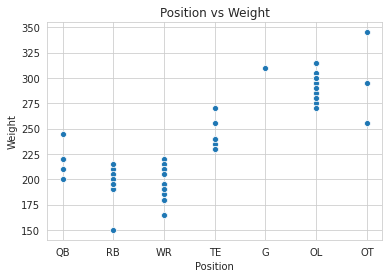

In [49]:
sns.set_style("whitegrid")
g = sns.scatterplot(x=roster["Position"], y=roster["Weight (lbs)"])
g.set_title("Position vs Weight")
g.set_xlabel("Position")
g.set_ylabel("Weight")

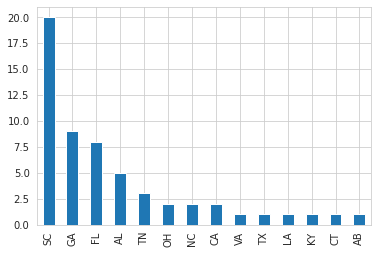

In [50]:
roster['Birth_State'] = roster['Birth_State'].astype('category')
g = roster['Birth_State'].value_counts().plot.bar()